# Decision Tree Classifier Visualization

***Importing necessary modules***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

***Loading the data***

In [2]:
data = datasets.load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

***Converting data to dataframes***

In [4]:
x= pd.DataFrame(data.data, columns=data.feature_names)
y= pd.DataFrame(data.target_names[data.target], columns=['target'])

<AxesSubplot:xlabel='target'>

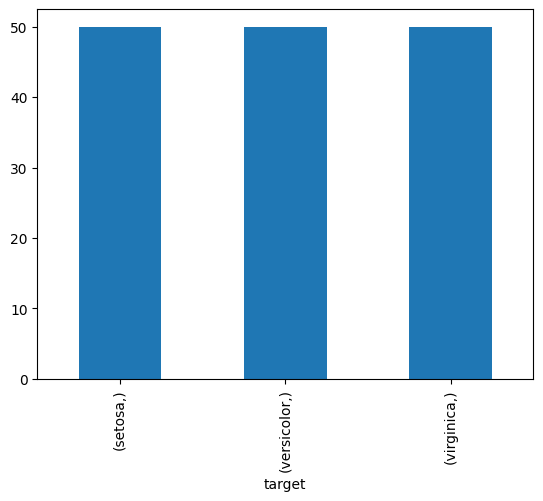

In [5]:
y.value_counts().plot(kind= 'bar')

In [6]:
print(x)
y['target'] = y['target'].replace(['setosa', 'versicolor', 'virginica'],[0,1,2])
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     target
0         0
1         0
2   

***Spiliting into training and testing dataset***

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state = 0)

In [8]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

***Building the model***

In [9]:
model = tree.DecisionTreeClassifier(random_state = 1234)

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [11]:
print('Accuracy score of training:',model.score(x_train, y_train))

Accuracy score of training: 1.0


***Testing the model***

In [12]:
pred = model.predict(x_test)

In [13]:
print('Accuracy score of testing:',model.score(x_test, y_test))

Accuracy score of testing: 1.0


# Visualization of Decision Tree Classifier

***Text Representation***

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= -0.82
|   |--- class: 0
|--- feature_2 >  -0.82
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.64
|   |   |   |--- feature_3 <= 0.41
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  0.41
|   |   |   |   |--- feature_0 <= 1.26
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1.26
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  0.67
|   |   |--- feature_2 <= 0.58
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.58
|   |   |   |--- class: 2



***Visualizing using plot_tree***

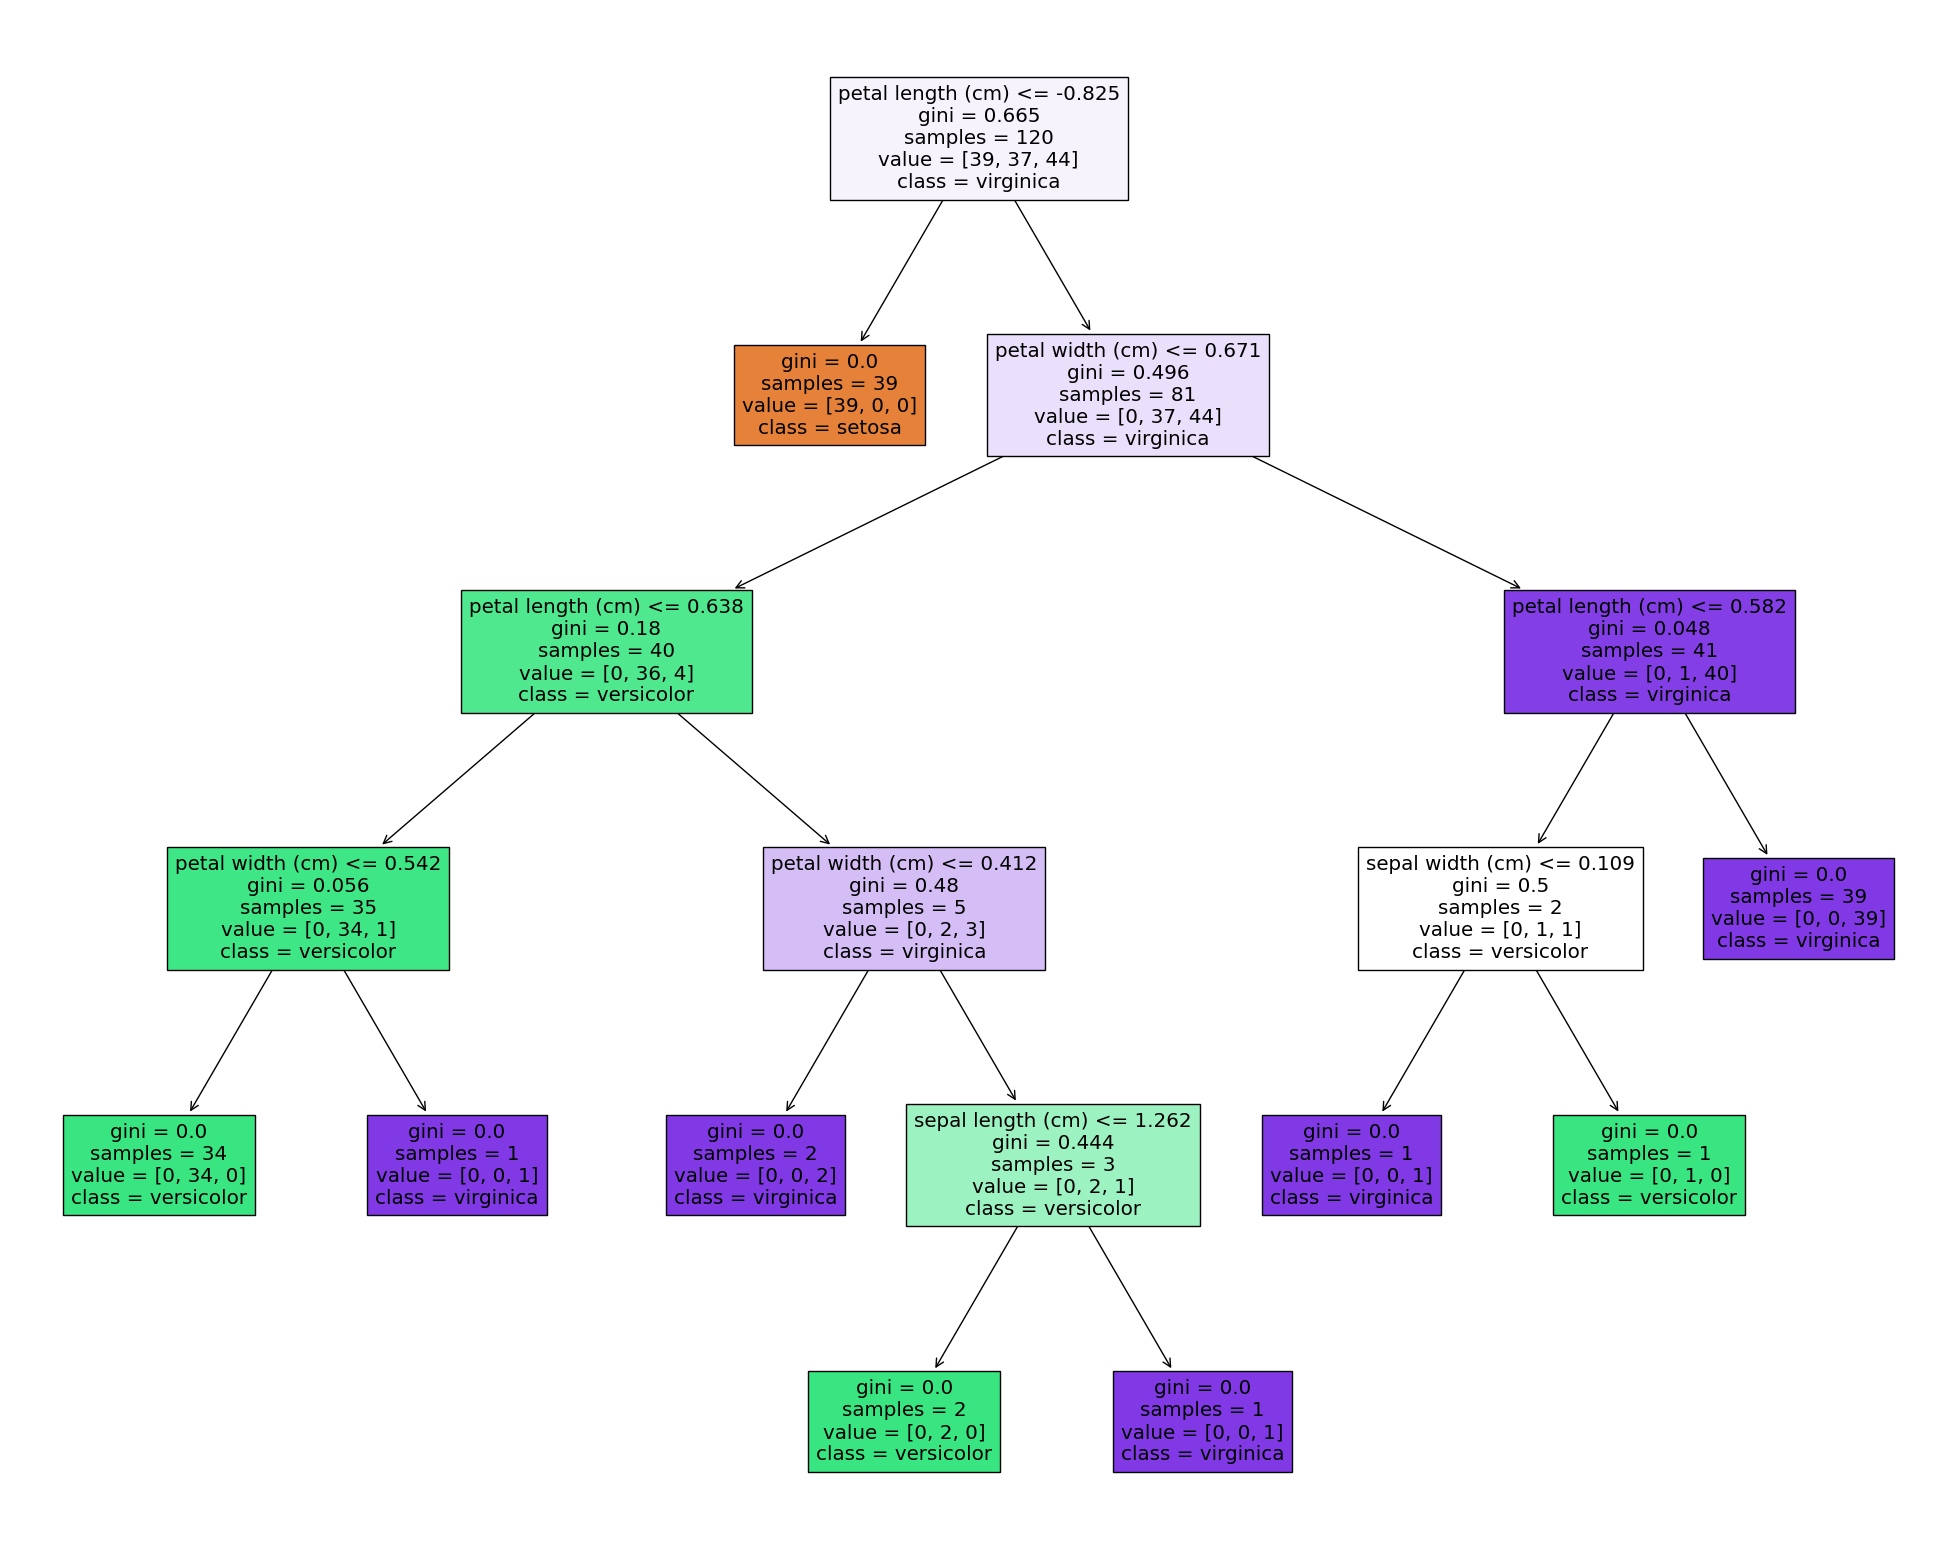

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)